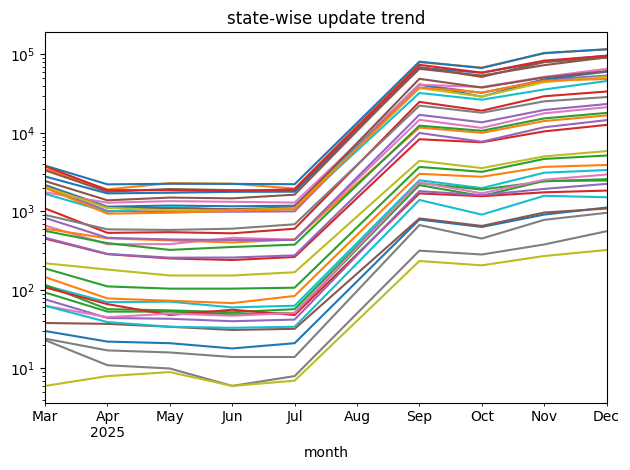

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=pd.concat([demographic_df,biometric_df])
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M")

trend=updates.groupby(["state","month"]).size().unstack(fill_value=0)

trend.T.plot(legend=False)
plt.yscale("log")
plt.title("state-wise update trend")
plt.tight_layout()
plt.show()
